In [ ]:
!pip install -qU transformers diffusers accelerate openai sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.6 MB/s eta 0:00:00


In [ ]:

!pip install transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.


We need to initialize the agent with an LLM. In this example we'll use OpenAI which does need an [API key](https://platform.openai.com/).

In [ ]:
import transformers
print(transformers.__version__)

4.29.1


In [ ]:
import os

os.environ['OPENAI_API_KEY'] = 'YOUR_API_KEY'  #platform.openai.com

In [ ]:
from transformers.tools import OpenAiAgent

agent = OpenAiAgent(
    model='text-davinci-003',
    api_key=os.environ['OPENAI_API_KEY']
)

Let's start with a simple example. Note that the first time we run this it will take longer as the image generation model must be downloaded.

==Explanation from the agent==
I will use the following  tool: `image_generator` to generate an image according to the prompt.


==Code generated by the agent==
prompt = "Person travelling to future in a spaceship"
image = image_generator(prompt)


==Result==


A new version of the following files was downloaded from https://huggingface.co/space/huggingface-tools/text-to-image:
- text_to_image.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/25 [00:00<?, ?it/s]

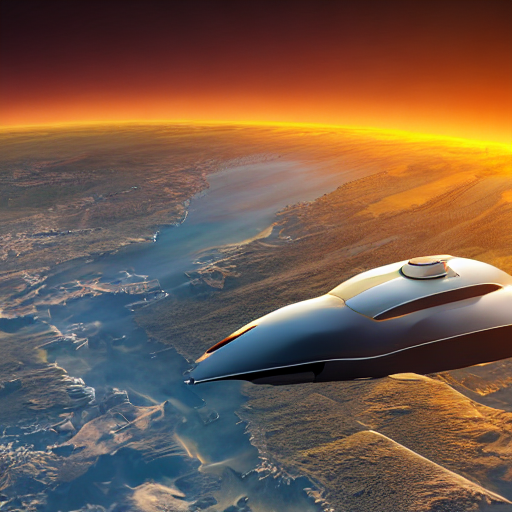

In [ ]:
person_image = agent.run("Generate the image of person travelling to future in a spaceship")
person_image

In [ ]:
from diffusers.utils import load_image
document = load_image("/content/excel-invoice-template.png")

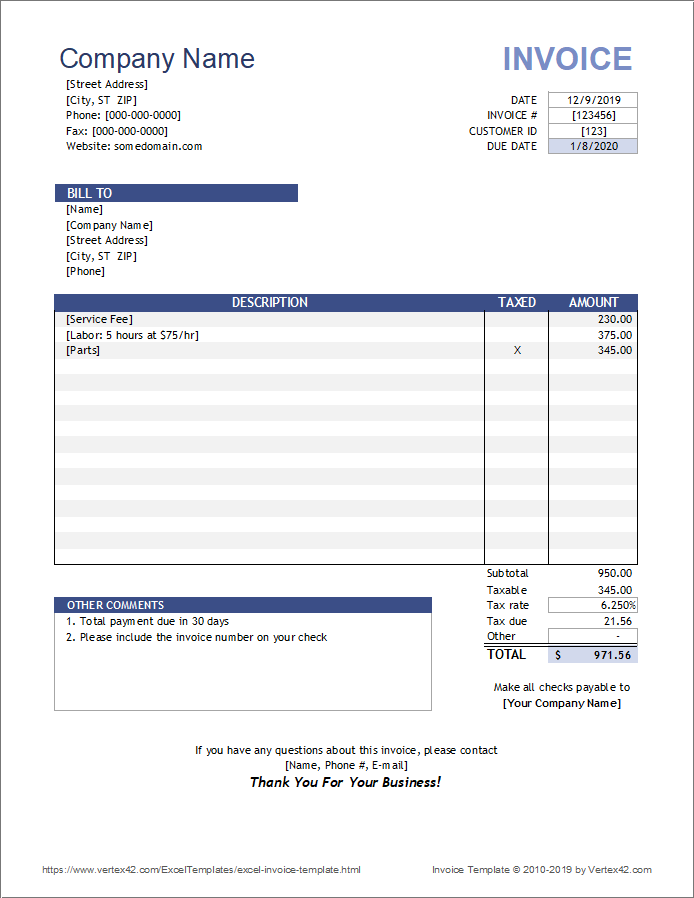

In [ ]:
document

In [ ]:
agent.run("Please help me to extract Total Amount, Invoice date and Biller address from the given `document`",document=document,)

==Explanation from the agent==
I will use the following  tool: `document_qa` to answer the questions about the document.


==Code generated by the agent==
total_amount = document_qa(document, question="What is the total amount?")
print(f"The total amount is {total_amount}.")
invoice_date = document_qa(document, question="What is the invoice date?")
print(f"The invoice date is {invoice_date}.")
biller_address = document_qa(document, question="What is the biller address?")
print(f"The biller address is {biller_address}.")


==Result==
The total amount is $ 971.56.
The invoice date is 12/9/2019.
The biller address is [name].


'[name]'

We can pass in variables to the prompts like so:

In [ ]:
from diffusers.utils import load_image
image = load_image("/content/download.jpeg")
agent.run("Please write a good SEO optimised product title for the given `image` in 10 words",image=image)

==Explanation from the agent==
I will use the following  tool: `image_captioner` to generate a caption for the image, then `text_classifier` to classify the caption and find the most relevant words for the product title.


==Code generated by the agent==
caption = image_captioner(image)
print(f"The caption is {caption}.")
labels = ["product", "title", "SEO", "optimised"]
title = text_classifier(text=caption, labels=labels)
print(f"The product title is {title}.")


==Result==


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


The caption is a man in a pink t shirt and black jeans.


The product title is title.


'title'

In [ ]:
print(agent.run_prompt_template)

I will ask you to perform a task, your job is to come up with a series of simple commands in Python that will perform the task.
To help you, I will give you access to a set of tools that you can use. Each tool is a Python function and has a description explaining the task it performs, the inputs it expects and the outputs it returns.
You should first explain which tool you will use to perform the task and for what reason, then write the code in Python.
Each instruction in Python should be a simple assignment. You can print intermediate results if it makes sense to do so.

Tools:
<<all_tools>>


Task: "Answer the question in the variable `question` about the image stored in the variable `image`. The question is in French."

I will use the following tools: `translator` to translate the question into English and then `image_qa` to answer the question on the input image.

Answer:
```py
translated_question = translator(question=question, src_lang="French", tgt_lang="English")
print(f"The tr

---

==Explanation from the agent==
I will use the tool `image_transformer` to change the color of the tshirt to blue.


==Code generated by the agent==
modified_image = image_transformer(image, prompt="blue tshirt")


==Result==


  0%|          | 0/50 [00:00<?, ?it/s]

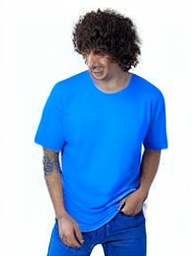

In [ ]:
agent.chat('Please the change the color of tshirt to blue in `image`',image=image)

In [ ]:
agent.chat("Please write a good description for the modified `image`",image=image)

==Explanation from the agent==
I will use the tool `image_captioner` to generate a product description for the image.


==Code generated by the agent==
description = image_captioner(image=modified_image)
print(f"The product description is {description}")


==Result==
The product description is a man in a blue shirt and jeans


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'a man in a blue shirt and jeans'